##  Regresion logistica
El problema que presenta la regresion logistica con respecto a la lineal es que la variable que decide es discreta: Yes or NOt, True or False, 1 or 0. La regresion lineal trabaja con variables continuas. El modelo

$$ h(\Theta) = X \Theta = Y$$
$$ \min_{\Theta} J(\Theta) = \min_{\Theta} \frac12 \| X \Theta - Y \|^2 $$
no es adecuado para los problemas de clasificacion de los que hablamos arriba.  Por que en vez de manejar variables continuas, tenemos variables (dependiente, $Y$) dicotomica (dichotomous dependent variables). Como vamos a resolver este problema.

Pre-requisitos: estadistica basica, likelihood function (verosimilitud). Por ejemplo lo del paciente con cancer:

$$ p( q_i \text{   tenga cancer} | x_i, \Theta) \ge \texttt{umbral}  $$


Como se halla el minimo teniendo la funcion de costo y el gradiente.


Pasos a seguir para el metodo del gradiente;
 
1. Definir (encontrar) la funcion de costo $J(\theta)$.
2. Encontrar el gradiente de la funcion de costo $\nabla J(\theta)$.
Encontrar las derivadas parciales $\frac{\partial J}{\partial \theta_k}$
El gradiente es un vector. Se usa NUMPY. Es numpy.array






In [ ]:
import numpy as np
a = np.array([3,4,5])
print(a)

# ejemplo
def J(theta1, theta2):
    return 3*theta1**2 + 4*theta2**2

def gradJ(theta1, theta2):
    return (6*theta1, 8*theta2)

theta1=4
theta2=5

gradienteJ = np.array([ gradJ(theta1,theta2)])
gradienteJ




[3 4 5]


array([[24, 40]])

$$ \nabla J = X^T X \theta - X^T y$$

Hay dos problemas con a regresion lineal



Exploremos lo que queremos. Definir una hipotesis que este
relacionada con la probabilidad como esta arriba. 

1. $h(\Theta)$ esta definido sobre un continuo.
2. $h(\Theta)$ no produce algo que no se puede interpretar estadisticamente.

Una aproximacion ingenua es:

$$ p_{ingenua} = p_{ingenua}( y=1 |  x, \theta_0, \theta_1) = \theta_0 + \theta_1 x$$

Aparece el siguiente problema. La expresio de la derecha va entre $-\infty$ e $\infty$. No es una probabilidad.

Vamos a recurrir a un concepto que se llama "odds". "chances", "posibilidades"

Si usted esta jugando y gana dos veces y pierde 3 veces , los chances de ganar son $2/5$. 

$$\textrm{odds} = \frac{p}{1-p} $$

Pensemos que al "odds" le queremos agregar condiciones como

1. Que este entre $-\infty$ y $\infty$. 
2. Que tuviera simetria, ???

Una idea interesante es tomar el logaritmo del odss

$$  \log \frac{p}{1-p} $$

Esta funcion va entre $-\infty$ e $\infty$. 

Para el segundo paso, miremos la simetria:

$$\log \frac{p}{1-p} = \log p - \log (1 - p) = -[ \log(1-p) - \log p] = - \log \frac{1-p}{p} $$

Con esta 'metrica' si podemos formular el problema como:

$$ \log \frac{p}{1-p} = \theta_0 + \theta_1 x   \quad , \quad (1) $$



In [10]:
p=1/3
e1 = np.log(p/(1-p))
e2 = -np.log((1-p)/p)
print(e1,e2)

-0.6931471805599454 -0.6931471805599455


$$ \log x = - \log (1/x)$$

$$ \log x^t = t \log x$$, si $t=-1$




Veremos a continuacion el "nacimiento" de la funcion **logisitca sigmoide** (**sigmoid logistic function**)



Despejamos $p$ de la ecuacion (1).

$y = \theta_0 + \theta_1 x $

\begin{eqnarray}
\log \frac{p}{1-p} &=& y \\
\frac{p}{1-p} &=& \mathrm{e}^y  \\
p &=& (1-p) \mathrm{e}^y \\
p + p \mathrm{e}^y &=& \mathrm{e}^y \\
p(1 + \mathrm{e}^y) &=& \mathrm{e}^y \\
p &=& \frac{\mathrm{e}^y}{1+ \mathrm{e}^y}
p &=& \frac{1}{1 + \mathrm{e}^{-y}} \\
p &=& \frac{1}{1 + \mathrm{e}^{-X \theta}}
\end{eqnarray}
donde $y = X \theta = \theta_0 + \theta_1 x$.

A la funcion $p$ de arriba la llamos, la logistic sigmoid function.

Notacion:

$p = S(\theta) = h(\theta, x)$.

La palabra "sigmoid" es por la "s". No solo la ligistica es "sigmoid",
la $\arctan x$ es sigmoid

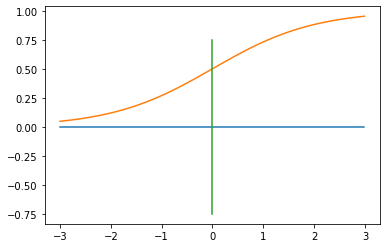

In [29]:
import numpy as np     
import matplotlib.pyplot as plt

def S(x):
    return 1/(1 + np.exp(-x))

x = np.arange(-3,3, 0.01)
ceros = np.zeros(len(x))


# plt.grid()
plt.plot(x, ceros)
plt.plot(x, S(x))
plt.plot(ceros, x/4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in arctanh
  


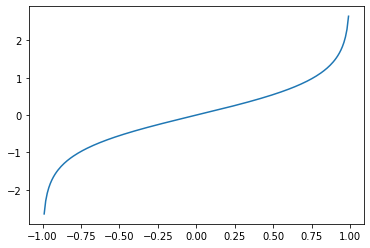

In [34]:
x = np.arange(-1,1, 0.01)
plt.plot(x, np.arctanh(x))

Que propiedades tiene la funcion logistica?

$$ S(t) = \frac{1}{1 + \mathrm{e}^{-t}}$$.

Tomemos la derivada:
$$ S'(t) = \frac{\mathrm{e}^{-t}}{(1 + \mathrm{e}^{-t})^2} = \mathrm{e}^{-t} S(t) .$$

\begin{eqnarray}
S'(t) = \frac{\mathrm{e}^{-t}}{(1 + \mathrm{e}^{-t})^2} = \frac{1}{1 + \mathrm{e}^{-t}} \frac{\mathrm{e}^{-t}}{1 + \mathrm{e}^{-t}} = \frac{1}{1 + \mathrm{e}^{-t}} \left ( 1 - \frac{1}{1 + \mathrm{e}^{-t}}
    \right ) = S(t) (1 - S(t))
\end{eqnarray}



Tenemos, entonces, recapitulando:

$$ h(\Theta, x^{(i)}) = S( x^{(i)} \Theta) = \frac{1}{1 + \mathrm{e}^{-x^{(i)} \Theta}} $$

Podemos decir ahora que la hipotesis se comporta como una probabilidad.

$$ h(\Theta, x^{(i)}) = p ( Y^{(i)} = 1 | x^{(i)}, \Theta)  $$

Por el momento estamos hablando de variables dependientes $Y$ dicotomicas (binarias). Es decir $Y=0$ o $Y=1$. Al final de la clase generalizamos a cualquier numero $K$ de valores discretos de $Y$.
Entonces la probabilidad $Y=0$, es

$$p( Y^{(i)} = 0 | x^{(i)}, \Theta) = 1 - p( Y^{(i)}=1 | x^{(i)}, \Theta) = 1 - h(\Theta, x^{(i)})  $$

Estas probabilidades, usando la funcion sigmoide logistica, son continuas.
Como hacer que este problema se convierta en un problema de regresion discreta con solo valores $Y=1$ o $Y=0$. Como construir un hipotesis discreta.

Definir un umbral $\gamma$ (por ejemplo $\gamma=1/2$. Asi definimos una hipotesis discreta con solo dos valores como sigue


\begin{eqnarray}
h_{binaria}(\Theta, x^{(i)}) = \left \{
    \begin{array}{cc}
    1 & \text{ si } x^{(i)} \Theta > \gamma \\
    0 & \text{ de lo contrario} 
    \end{array}
    \right . 
\end{eqnarray}

9:20 am

Hasta el momento estamos acostumbrados a funciones de costo de la forma

$$J(\theta) = \frac12 \| h(\theta, X) - Y \|^2 = \frac12 \sum_{i=1}^m ( h_i(\theta, X) - Y_i)^2 $$

Reduerde que queremos ahora usar la funcion logistica $S(theta)$ y si usamos la funcion logistica en esta funcion de costo como hipotesis, podemos obtener funcion no convexas. El que sea no convexa puede ser problema.
Veamos un ejemplo. Asumamos la funcion de costo de arriba con un solo termino y con $S(1  + \theta)$, 

$$J(\theta)^{(i)} = \frac12 ( S(1+ \theta) - 1)^2  $$

Como encontramos que una funcion no es convexa. Un metodo es hallar la segunda derivada y ver que tiene dos signos. Parte esta por encima del eje $x$ y o otra parte por debajo.



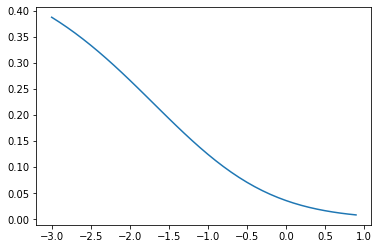

In [40]:
def S(x):
    return 1/(1 + np.exp(-x))

x = np.arange(-3,1,0.1)
plt.plot(x, 0.5* (S(1+x)-1)**2)


Recuerde que $S'(t) = \mathrm{e}^{-t} S^2(t)$.

$$ \frac{d J(\theta)^{(i)}}{d \theta} = (S(1 + \theta) -1) \mathrm{e}^{-1 - \theta} S^2(1 + \theta) = -\mathrm{e}^{-1 - \theta} S^2 (1 + \theta) + S^3(1 + \theta) \mathrm{e}^{-1 - \theta}  $$

Una derivada mas

\begin{eqnarray}
\frac{d J(\theta)^{(i)}}{d \theta^2} &=& \mathrm{e}^{-1 - \theta} S^2(1 + \theta) -2 \mathrm{e}^{-2 - 2 \theta} S^3(1 + \theta)  + 3 S^4(1 + \theta) \mathrm{e}^{-2 - 2 \theta} - S^3(1 + \theta) \mathrm{e}^{-1 - \theta} 
\\
&=&\mathrm{e}^{-1 - \theta} S^2(1 + \theta) [ 1 - 2 S(1 + \theta) \mathrm{e}^ {-1 - \theta} + 3 S^2(1 + \theta) \mathrm{e}^{-1 - \theta} - S(1+ \theta) ]
\end{eqnarray}



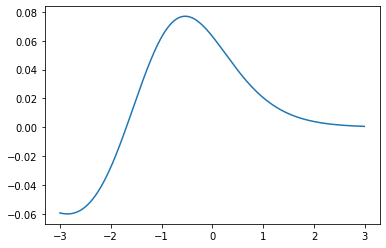

In [44]:
x = np.arange(-3,3,0.01)

def g(x):
    return np.exp(-1 - x)* ( (S(1+x)**2 )*( 1 - 2*S(1+x)*np.exp(-1-x) + 3*(S(1+x))**2* np.exp(-1 -x) - S(1+x)))


plt.plot(x, g(x))

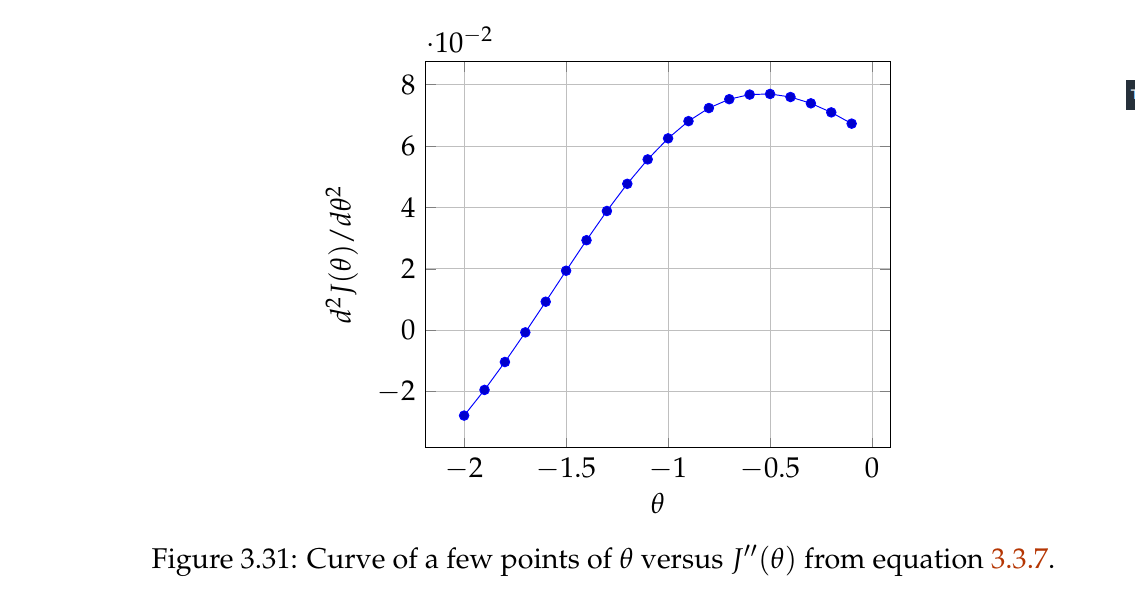

El punto es que esta funcion de costo no es convexa. Vamos a disenhar otra estrategia. Aca necesitamos estadistica basica. 

Funcion de verosimilitud (likelihood function).


Reuerde:
* Necesitamos hallar $J(\theta)$
* Necesitamos hallar $\nabla J(\theta)$.


El argumento es el siguiente: Tenemos imagenes con solo perros o gatos.
Asuma $p = p( y_i = cat | x^{(i)}, \theta)  $ es decir:


$$ h(\theta, x^{(i)}) = p(y_i  = \text{cat} | x^{(i)}; \theta) = S( x^{(i)} \theta) = \frac{1}{1 + \mathrm{e}^{-x^{(i)} \theta}}$$

La probabilidad de ser perro esta dada por

$$ 1- h(\theta, x^{(i)}) = p(y_i  = \text{perro} | x^{(i)}; \theta) = 1 - S( x^{(i)} \theta) = 1 - \frac{1}{1 + \mathrm{e}^{-x^{(i)} \theta}}$$


Es interesante que ambas probabilidades se pueden escribir en una sola, asi

$$ p( y_i | x^{(i)}; \theta) = h(\theta, x^{(i)})^{y_i} (1 - h(\theta, x^{(i)})^{1 - y_i} $$



Tomamos un conjunto $X$ de datos. Unos son perros y otros gatos, pero no hay un elemento perro-gato. Los perros son indepnedientes estadistiamente de los gatos. Entonces la probabilidad de la union es el producto de las probabilidades.
De aca sale la "verosimilitud" (likelihood)

$$ \mathcal{L}(\theta) = p(Y | X; \theta) = \prod_{i=1}^m h(\theta, x^{(i)})^{y_i} (1 - h(\theta, x^{(i)})^{1 - y_i} $$

Lo que queremos es maximizar la versosimilitud. Hay dos problemas:

1. Estamos acostrumbrados a minimzar. Esto no es problema por que cambiamos el signo y el maximo de $f$ es el minimo de $-f$.

2. Esta expresion es dificil de operar en calculo. Si sacamos logaritmo la simpificamos. El logaritmo es convexo. El minimo se conserva en su lugar.

Tomemos el logaritmo

$$ \log \mathcal{L}(\theta) = \log p(Y | X; \theta) = \sum_{i=1}^m y_i \log [ h(\theta, x^{(i)}) ] + (1 - y_i) \log[1 - h(\theta, x^{(i)}] $$

La funcion de costo para la regresion logistica es:

$$ J(\theta) =- \frac1m\sum_{i=1}^m y_i \log [ h(\theta, x^{(i)}) ] + (1 - y_i) \log[1 - h(\theta, x^{(i)})] + \frac{\lambda}{2 m} \| \theta \|^2  $$, donde agregamos el termino de regularizacion.

Esta funcion de costo aparece en la termodinamica (mecanica estadistica) y en la teoria de la informacion y se llama 
funcion de entropia cruzada (**cross entropy function**).

Ahora toca sacar el gradiente.

Tomemos un termino generico y aplicamos linealidad.
Recuerde que $h(\theta, x^{(i)})=S$ y que $S'=S(1-S)$.

$$ \frac{\partial y_i \log[h(\theta, x^{(i)})]}{\partial \theta_k}  = y_i \frac1S S' x_{ik} = y_i \frac1S S(1-S) x_{ik} = y_i(1 -S) x_{ik} $$

$$\frac{\partial (1-y_i) \log[ 1 - h(\theta, x^{(i)})] }{\partial \theta_k}  = -(1 - y_i) \frac{1}{1-S} S' x_{ik} = (y_i -1) \frac{1}{1-S} S(1-S)x_{ik}= (y_i -1) S x_{ik}$$

De forma, combinando los dos terminos de arriba:

\begin{eqnarray}
\frac{\partial y_i \log[h(\theta, x^{(i)})]}{\partial \theta_k} + \frac{\partial (1-y_i) \log[ 1 - h(\theta, x^{(i)})] }{\partial \theta_k}  &=& y_i(1-S) x_{ik} + (y_i-1) S x_{ik} \\
&=& y_i x_{ik} - y_i S x_{ik} + y_i S x_{ik} - S x_{ik} \\
&=& (y_i - S) x_{ik} \\
&=& -( h(x^{(i)}, \theta) - y_i) x_{ik}
\end{eqnarray}



Entonces: (sumando la contribucion de la regularizacion)

$$ \frac{\partial J(\theta)}{\partial \theta_k}  = \frac1m \sum_{i=1}^m ( h(\theta, x^{(i)}) - y_i) x_{ik} + \lambda \theta_k $$

Cerremos:

Tenemos , dado un $\alpha$.
* $J(\theta)$
* $\nabla J(\theta)$
* Toca mimizar con el metodo del gradiente:
    * Se comienza con un $\theta_0$
    * $\theta_1 = \theta_0 - \alpha \nabla J(\theta)$
    * Se continua el ciclo $\theta_i = \theta_{i-1} - \alpha \nabla J(\theta_{i-1}) $. 
    * Hasta que se agoten el numero de iteraciones o el error sea mas pequeno que un umbral. 

Que pasa si hay mas de dos clases? multiclase, $K$ clases con $K>2$.

\

Describimos tres estrategias:

* Softmax regression : es una generalizacion del logistic sigmoid.

\begin{eqnarray}
\sigma: \mathbb{R}^K &\to& [0,1]^K \\
(z_i) &\mapsto& \sigma(z_i) = \frac{\mathrm{e}^{z_i}}{\sum_{j=1}^K \mathrm{e}^{z_j}} \quad , \quad i = 1,2, \cdots, K, z_i \in \mathbb{R}
\end{eqnarray}

Esta funcion es positiva entre 0 y  1. Y la suma de todos los terminos da 1.
Se comporta como una probabilidad. Para el caso de $K=2$ se puede ver (ejercicio al estudiante) que se reduce al sigmoid logistic.

Veamos como queda la funcion hipotesis explicita:



 \begin{eqnarray*}
    h(\theta,x) = \begin{pmatrix}
      P(y=1 | x ; \theta) \\
      P(y=2 | x ; \theta) \\
      \vdots \\
      P(y=K | x ; \theta) \\
    \end{pmatrix}
    = 
    \begin{pmatrix}
      \sigma(z_1) \\
      \sigma(z_2) \\
      \vdots \\
      \sigma(z_K) \\
    \end{pmatrix}
    =
    \frac{1}{\sum_{j=1}^K \mathrm{exp}({\theta^{(j)}}^T x)}
    \begin{pmatrix}
      \mathrm{exp}({\theta^{(1)}}^T x) \\
      \mathrm{exp}({\theta^{(2)}}^T x) \\
      \vdots \\
      \mathrm{exp}({\theta^{(K)}}^T x) \\
    \end{pmatrix} ,
  \end{eqnarray*}


Necesitamos la funcion de costo y su gradiente.

La funcion de costo esta dada por



* One-hot encoding (codigo uno caliente)
* uno-vs-el resto (dicen uno contra todos)

\begin{eqnarray}
    J(\theta) = - \left [
      \sum_{i=1}^m \sum_{k=1}^K {1} \{  y^{(i)}  = k  \} \log
      \frac{\mathrm{exp} \left ({\theta^{(k)}}^T x \right )}
      {\sum_{j=1}^K  \mathrm{exp} \left ({\theta^{(j)}}^T x \right )}  
    \right ],
  \end{eqnarray}

Donde $1 \{ x \}$ es la funcion indicadora (indicator function) definida por


\begin{eqnarray}
1 \{ x \} =  \left \{
    \begin{array}{cc}
    1  & \text{  si  $x$ es verdad } \\
    0 & \text{ de lo contrario} 
    \end{array}
    \right .
\end{eqnarray}

El gradiente esta dado por

$$ \nabla_{\theta} J(\theta)  = - \sum_{i=1}^m  \left [ x^{(i)} \left ( 1 \{ y^{(i)} = k \}  - p(y^{(i)} = k | x^{(i)}; \theta) ) \right )  \right ]$$